# Parabilic SAR AF パラメータのスクリーニング・チェック (2) 集計

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os
import re

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)
import seaborn as sns

from funcs.common import add_data_af

In [3]:
name_doe = 'Simple_SAR_2'
name_doe_2 = 'study_202_AF'
dir_path = '../doe/results_%s' % name_doe
list_date = sorted(
    [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]
)
print(list_date)

['2025-03-19', '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-18', '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25', '2025-04-28']


In [4]:
pattern = re.compile(r'summary.*_([0-9a-z]{4}).*\.html')
df_7011 = pd.DataFrame()
df_7203 = pd.DataFrame()
df_8306 = pd.DataFrame()

dict_html = dict()

for date in list_date:
    for f in sorted(os.listdir(os.path.join(dir_path, date))):
        m = pattern.match(f)
        if m:
            code = m.group(1)
            dict_html[code] = f
    for code in dict_html.keys():
        tbl = pd.read_html(os.path.join(dir_path, date, dict_html[code]))
        if code == '7011':
            add_data_af(df_7011, tbl[0], date)
        elif code == '7203':
            add_data_af(df_7203, tbl[0], date)
        elif code == '8306':
            add_data_af(df_8306, tbl[0], date)
        else:
            pass

#print(df_7011)
#print(df_7203)
#print(df_8306)

In [5]:
df_7011[df_7011.columns[len(df_7011.columns) - 1]]

0      400
1      400
2    -1800
3    -2200
4    -1700
5    -1900
6    -1200
7    -1000
8    -2400
9    -1400
10   -1300
11   -2200
12    -600
13    -900
14   -1700
15   -3200
16   -2500
17   -3700
18   -4800
19   -6600
Name: 2025-04-28, dtype: int64

In [6]:
df_sum = pd.DataFrame()
df_sum['af_init'] = df_7011['af_init']
df_sum['af_step'] = df_7011['af_step']
df_sum['af_max'] = df_7011['af_max']
df_sum

,af_init,af_step,af_max
0,0.0,0.00001,0.00010
1,0.0,0.00002,0.00020
2,0.0,0.00003,0.00030
3,0.0,0.00005,0.00050
4,0.0,0.00007,0.00075
5,0.0,0.00010,0.00100
6,0.0,0.00020,0.00200
7,0.0,0.00030,0.00300
8,0.0,0.00050,0.00500
9,0.0,0.00075,0.00750


In [7]:
df_sum['7011'] = df_7011.sum(axis=1)
df_sum['7203'] = df_7203.sum(axis=1)
df_sum['8306'] = df_8306.sum(axis=1)
df_sum

,af_init,af_step,af_max,7011,7203,8306
0,0.0,0.00001,0.00010,-14999.99989,-10199.99989,27550.00011
1,0.0,0.00002,0.00020,-19899.99978,8200.00022,43550.00022
2,0.0,0.00003,0.00030,-12199.99967,23200.00033,46750.00033
3,0.0,0.00005,0.00050,5700.00055,20600.00055,45250.00055
4,0.0,0.00007,0.00075,26700.00082,24400.00082,41750.00082
5,0.0,0.00010,0.00100,3900.00110,42700.00110,33250.00110
6,0.0,0.00020,0.00200,15700.00220,3200.00220,38350.00220
7,0.0,0.00030,0.00300,37100.00330,-12899.99670,19650.00330
8,0.0,0.00050,0.00500,-22999.99450,600.00550,33650.00550
9,0.0,0.00075,0.00750,-32599.99175,24100.00825,35850.00825


## AF step vs. Profit (median)

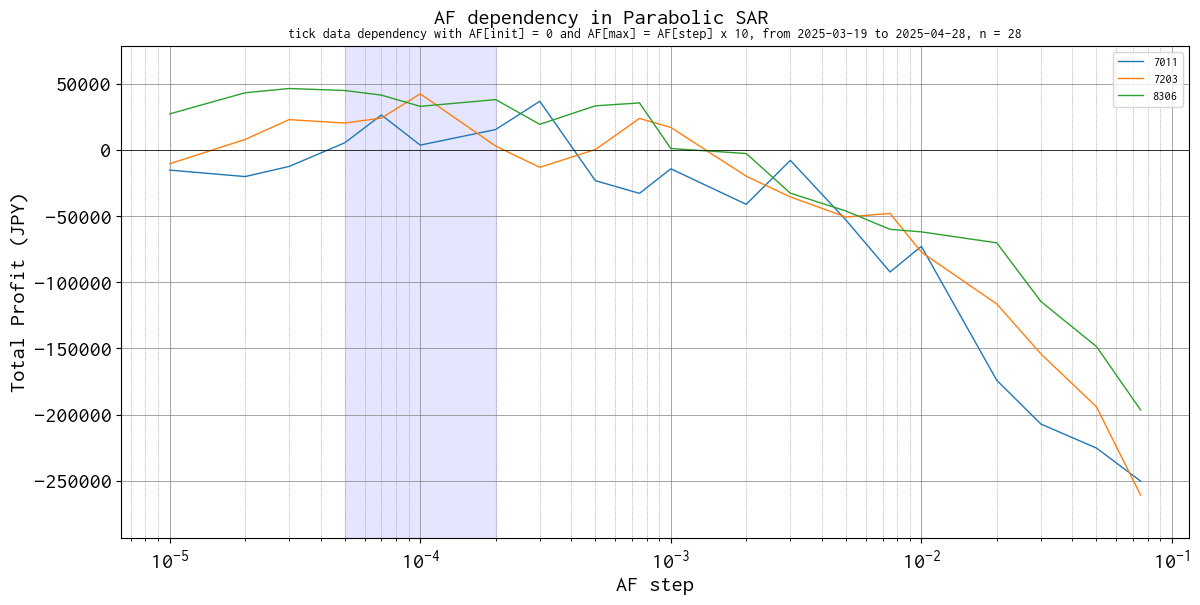

In [8]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

x = df_sum['af_step']
y = dict()
for i, code in enumerate(['7011', '7203', '8306']):
    y[i] = df_sum[code]
    ax.plot(x, y[i], label='%s' % code, lw=1)


threshold = 0
ax.fill_between(
    x, 0, 1,
    where=(y[0] > threshold) & (y[1] > threshold) & (y[2] > threshold),
    color='blue',
    alpha=0.1,
    transform=ax.get_xaxis_transform()
)

ax.axhline(0, color='black', lw=0.5)
ax.set_xscale('log')
ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)

ax.set_xlabel('AF step')
ax.set_ylabel('Total Profit (JPY)')
ax.legend(fontsize=9)

ax.set_title(
    'tick data dependency with AF[init] = 0 and AF[max] = AF[step] x 10, from %s to %s, n = %d' % (
        list_date[0], list_date[len(list_date) - 1], len(list_date)
    ),
    fontsize=10
)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.92)
plt.savefig('./%s/total.png' % name_doe_2)
plt.show()

## Seaborn 用にデータセットを準備

stack() を使わないのか？

https://note.nkmk.me/python-pandas-stack-unstack-pivot/

In [9]:
df = pd.DataFrame()
#code = ['7011', '7203', '8306']
#df_code = [df_7011, df_7203, df_8306]
for code, df_code in zip(['7011', '7203', '8306'], [df_7011, df_7203, df_8306]):
    for date in list_date:
        for af_step in df_code['af_step']:
            profit = df_code[df_code['af_step'] == af_step][date].iloc[0]
            r = len(df)
            df.loc[r, 'af_step'] = af_step
            df.loc[r, 'code'] = code
            df.loc[r, 'date'] = date
            df.loc[r, 'profit'] = profit
df

,af_step,code,date,profit
0,0.00001,7011,2025-03-19,-3350.0
1,0.00002,7011,2025-03-19,-7850.0
2,0.00003,7011,2025-03-19,-5750.0
3,0.00005,7011,2025-03-19,-5750.0
4,0.00007,7011,2025-03-19,-5250.0
...,...,...,...,...
1675,0.01000,8306,2025-04-28,-4900.0
1676,0.02000,8306,2025-04-28,-5600.0
1677,0.03000,8306,2025-04-28,-8100.0
1678,0.05000,8306,2025-04-28,-10900.0


## Boxplot

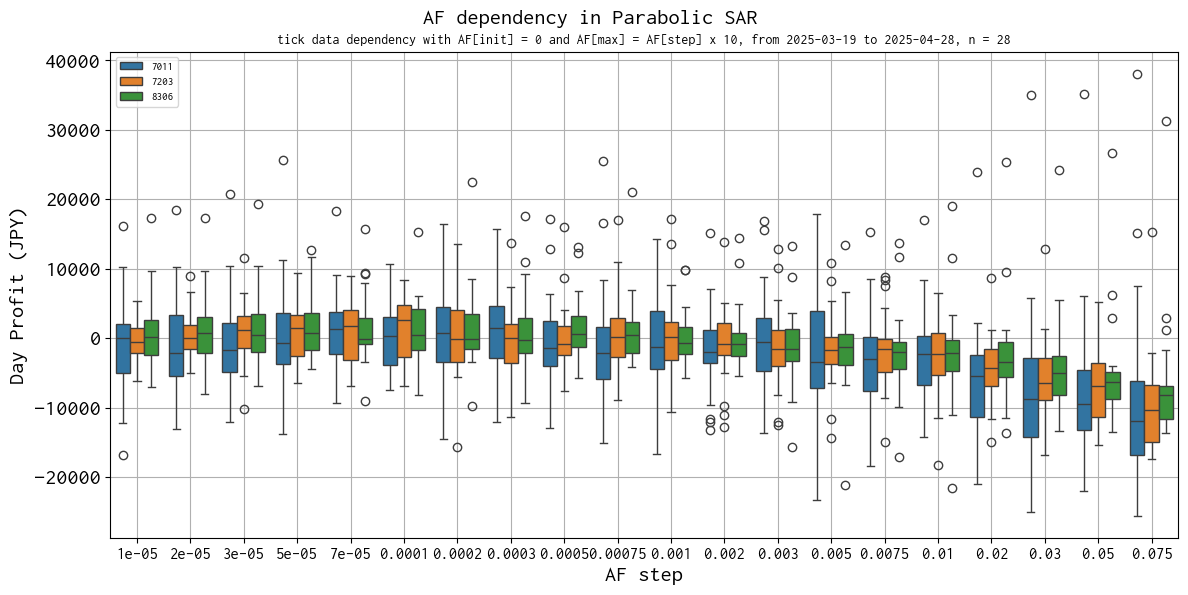

In [10]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

sns.boxplot(data=df, x='af_step', y='profit', hue='code', ax=ax)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_xlabel('AF step')
ax.set_ylabel('Day Profit (JPY)')
ax.legend(fontsize=8)

ax.grid()
ax.set_title(
    'tick data dependency with AF[init] = 0 and AF[max] = AF[step] x 10, from %s to %s, n = %d' % (
        list_date[0], list_date[len(list_date) - 1], len(list_date)
    ),
    fontsize=10
)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.91)
plt.savefig('./%s/boxplot.png' %  name_doe_2)
plt.show()